# Red Neuronal Desde Cero #

## Programa desarrollado en base al video: https://www.youtube.com/watch?v=W8AeOXa_FqU #

In [1]:
#-*- coding: utf-8 -*-

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles   #Para su uso en clasificacion

(500, 1)


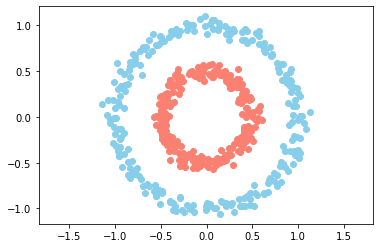

In [2]:
#Crear DataSet

n= 500    #Nro de regitros
p= 2    #Nro de caracteristicas de los registros

X, Y= make_circles(n_samples= n, factor= 0.5, noise= 0.05)

Y= Y[:, np.newaxis]    #Requerimos que Y sea una matriz columna, para no tener inconvenientes luego

print(Y.shape)

plt.scatter(X[Y[:, 0] == 0,0], X[Y[:, 0] == 0,1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1,0], X[Y[:, 0] == 1,1], c="salmon")
plt.axis("equal")    #Muestra los ejes con la misma proporción

plt.show()

In [3]:
#Clase de la capa de la red

class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f= act_f

    self.b= np.random.rand(1, n_neur) * 2 - 1    #Parámetro de bias (vector)
    self.w= np.random.rand(n_conn, n_neur) * 2 - 1    #Conexiones (matriz) en base al número de neuronas de la capa anterior y al número de la capa actual 


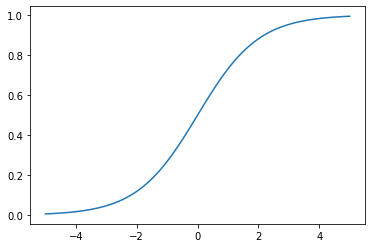

In [4]:
#Funciones de activacion

sigm= (lambda x: 1 / (1  + np.e ** (-x)),   #Funcion sigmoide
       lambda x: x * (1 - x))   #Derivada de la funcion sigmoide

relu= lambda x: np.maximum(0, x)    #Funcion Relu: devuelve el maximo entre 0 y x

_x= np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))
#plt.plot(_x, relu(_x))

In [5]:
#Se crea la red neuronal

##Se podría crear la red definiendo capa por capa:
#l0= neural_layer(p, 4, sigm)
#l1= neural_layer(4, 8, sigm)
#...
#Se pueden agregar mas capas

def create_nn(topology, act_f):   #Esta funcion creara la red neuronal, en este caso se define
    #una sola función de activación para todas las capas (se podría especificar por capa).
    
    nn= []
    
    for l, layer in enumerate(topology[:-1]):
        
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
        
    return nn

topology= [p, 4, 8, 16, 8, 4, 1]  #Topologia de la red, 
#cada valor corresponde a la cantidad de neuronas de cada capa

create_nn(topology, sigm)


In [6]:
#Definimos la función que entrenará la Red Neuronal:
# Paso hacia adelante - entrada, se ejecutan sumas ponderadas y funciones de activación, y se obtiene salida que luego se irá ajustando
# Se compara la salida obtenida con los datos de salida de entrenamiento en base a la funcion de coste, se obtiene el error
# Backpropagation se obtienen las derivadas parciales para luego con el algoritmo del descenso del gradiente para optimizar la función de coste.

topology= [p, 4, 8, 1]

neural_net= create_nn(topology, sigm)

l2_cost= (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),    #Error cuadrático medio
          lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train= True):    #lr: learning rate parámetro utilizado en el descenso del gradiente
    
    out= [(None, X)]
    
    #Forward pass
    
    for l, layer in enumerate(neural_net):
        
        z= out[-1][1] @ neural_net[l].w + neural_net[l].b
        a= neural_net[l].act_f[0](z)
        
        out.append((z, a))
    
    #print(l2_cost[0](out[-1][1], Y))
    
    if train:
        
        #Backward pass
        
        deltas= []
        
        for l in reversed(range(0, len(neural_net))):
            
            z= out[l+1][0]
            a= out[l+1][1]
            
            #print(a.shape)
            
            if l== len(neural_net) - 1:
                #Calcular delta última capa.
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
                
                #print(deltas)
                
            else:
                #Calcular delta respecto a capa previa.
                deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))
                
            _w= neural_net[l].w
            
            #Gradient descent
            neural_net[l].b= neural_net[l].b - np.mean(deltas[0], axis= 0, keepdims= True) * lr
            neural_net[l].w= neural_net[l].w - out[l][1].T @ deltas[0] * lr
            
    return out[-1][1]
        
        
    
train(neural_net, X, Y, l2_cost, 0.5)
print("")
    


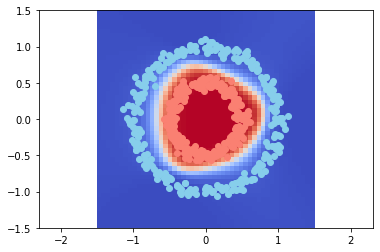

KeyboardInterrupt: 

In [7]:
import time
from IPython.display import clear_output

neural_n= create_nn(topology, sigm)

loss= []    #Evolución del coste

for i in range(2500):
    
    #Entrenamos la red
    pY= train(neural_n, X, Y, l2_cost, lr= 0.05)
    
    if i % 25 == 0:
        
        print(pY)
        
        loss.append(l2_cost[0](pY, Y))
        
        res= 50
        
        _x0= np.linspace(-1.5, 1.5, res)
        _x1= np.linspace(-1.5, 1.5, res)
        
        _Y= np.zeros((res, res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1]= train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train= False)[0][0]
                
        plt.pcolormesh(_x0, _x1, _Y, cmap= "coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c= "skyblue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c= "salmon")
        
        clear_output(wait= True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)